In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/emotion_input_output
!ls

/content/drive/My Drive/1.3_emotion_input_output
input  output


In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
dataset_folder='./input/CK+48'
sub_folders=os.listdir(dataset_folder)

sub_folders

['surprise', 'anger', 'fear', 'disgust', 'happy', 'contempt', 'sadness']

In [ ]:
i=0
last=[]
images=[]
labels=[]
temp = sub_folders

for sub_folder in sub_folders:
  sub_folder_index = temp.index(sub_folder)
  label = sub_folder_index
  if  label in [4, 6]:
    new_label=0
  elif label in [0,5]:
    new_label=1
  else:
    new_label=2

  path = dataset_folder+'/'+sub_folder
  sub_folder_images= os.listdir(path)

  for image in sub_folder_images:
    image_path = path+'/'+image
    print(image_path+"\t"+str(new_label))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image= cv2.resize(image,(48,48))
    images.append(image)
    labels.append(new_label)
    i+=1
  last.append(i)

./input/CK+48/surprise/S122_001_00000010.png	1
./input/CK+48/surprise/S117_001_00000013.png	1
./input/CK+48/surprise/S130_001_00000017.png	1
./input/CK+48/surprise/S132_008_00000008.png	1
./input/CK+48/surprise/S117_001_00000014.png	1
./input/CK+48/surprise/S127_001_00000017.png	1
./input/CK+48/surprise/S138_004_00000013.png	1
./input/CK+48/surprise/S124_001_00000014.png	1
./input/CK+48/surprise/S126_004_00000010.png	1
./input/CK+48/surprise/S119_001_00000010.png	1
./input/CK+48/surprise/S132_008_00000009.png	1
./input/CK+48/surprise/S136_001_00000019.png	1
./input/CK+48/surprise/S132_008_00000010.png	1
./input/CK+48/surprise/S129_002_00000010.png	1
./input/CK+48/surprise/S133_009_00000005.png	1
./input/CK+48/surprise/S127_001_00000015.png	1
./input/CK+48/surprise/S136_001_00000018.png	1
./input/CK+48/surprise/S135_001_00000038.png	1
./input/CK+48/surprise/S135_001_00000037.png	1
./input/CK+48/surprise/S138_004_00000012.png	1
./input/CK+48/surprise/S133_009_00000004.png	1
./input/CK+48

In [ ]:
images_x = np.array(images)
labels_y = np.array(labels)
images_x = images_x/255
images_x.shape

num_of_classes = 3
labels_y_encoded = tf.keras.utils.to_categorical(labels_y,num_classes=num_of_classes)

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(images_x, labels_y_encoded,test_size=0.25, random_state=10)
print('X_train:',len(X_train))
print('X_test:',len(X_test))


X_train: 735
X_test: 246


In [ ]:
input = Input(shape = (48,48,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(3,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam", loss=["categorical_crossentropy"], metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                             

In [ ]:
fle_s='./output/emotion_model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
save = model.fit(X_train,Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=50,callbacks=[callback_list])


Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 1.3293 - accuracy: 0.3605
Epoch 1: loss improved from inf to 1.32928, saving model to ./output/emotion_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 10s 384ms/step - loss: 1.3293 - accuracy: 0.3605 - val_loss: 1.2467 - val_accuracy: 0.4065
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 1.1837 - accuracy: 0.4299
Epoch 2: loss improved from 1.32928 to 1.18369, saving model to ./output/emotion_model.h5
23/23 [==============================] - 6s 248ms/step - loss: 1.1837 - accuracy: 0.4299 - val_loss: 1.0212 - val_accuracy: 0.6179
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.8111 - accuracy: 0.6367
Epoch 3: loss improved from 1.18369 to 0.81106, saving model to ./output/emotion_model.h5
23/23 [==============================] - 8s 345ms/step - loss: 0.8111 - accuracy: 0.6367 - val_loss: 0.7176 - val_accuracy: 0.7236
Epoch 4/50
23/23 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.7238
Epoch 4: loss improved from 0.81106 to 0.68058, saving model to ./output/emotion_model.h5
23/23 [==============================] - 6s 245ms/step

In [ ]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

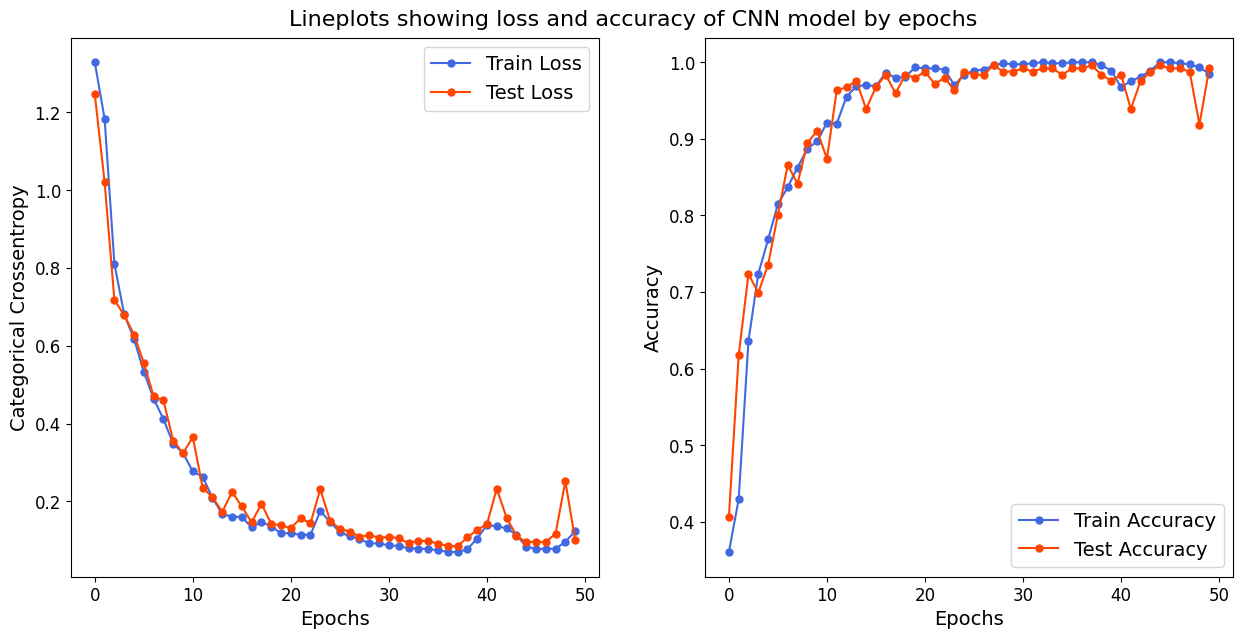

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)